In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [4]:
df = pd.read_csv("insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

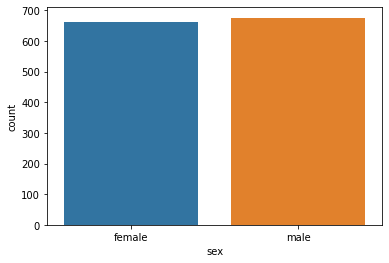

In [6]:
plt.subplot(1, 1, 1)
sns.countplot(x='sex', data=df)
plt.show()


<AxesSubplot:xlabel='children', ylabel='count'>

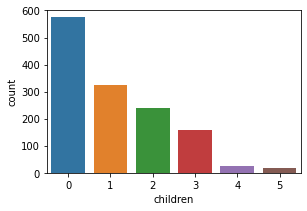

In [7]:
f = plt.figure(figsize=(10, 3))
f.add_subplot(121)
sns.countplot(x='children', data=df)


<AxesSubplot:xlabel='smoker', ylabel='count'>

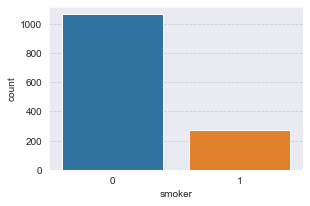

In [50]:
f = plt.figure(figsize=(10, 3))
f.add_subplot(121)
sns.countplot(x='smoker', data=df)

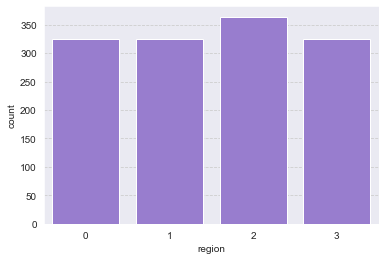

In [54]:
sns.countplot(x='region', data=df, color="mediumpurple")
plt.show()


<AxesSubplot:xlabel='expenses'>

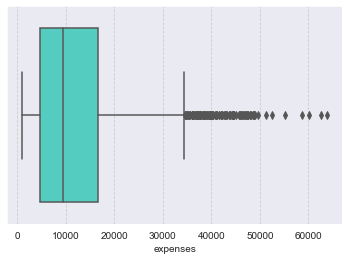

In [55]:
sns.boxplot(data=df, x="expenses", color = "turquoise")


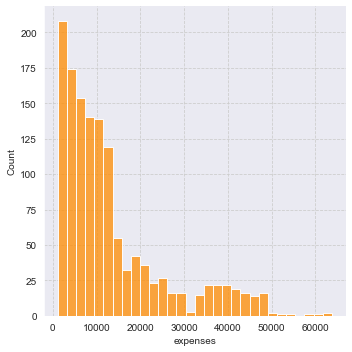

In [48]:
sns.displot(data=df, x="expenses", color='darkorange')
plt.show()


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


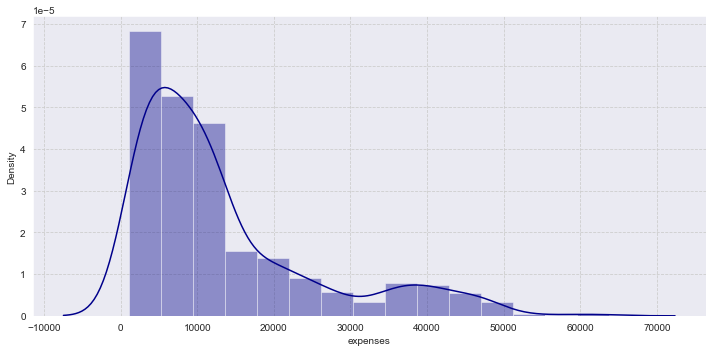

In [14]:
plt.figure(figsize=(10,5))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.distplot(df['expenses'],bins=15,color='darkblue')
plt.tight_layout()
plt.grid(True)
plt.show()

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


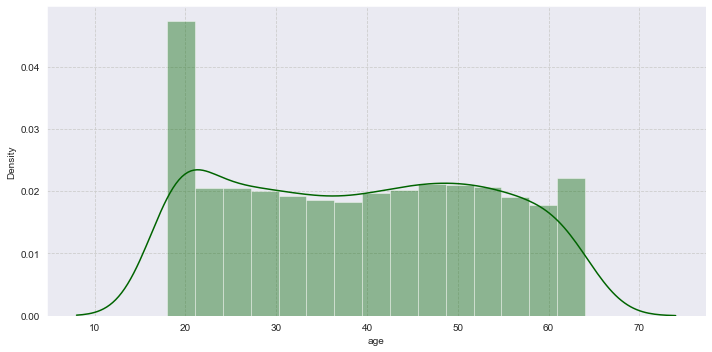

In [15]:
plt.figure(figsize=(10,5))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.distplot(df['age'],bins=15,color='darkgreen')
plt.tight_layout()
plt.grid(True)
plt.show()

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


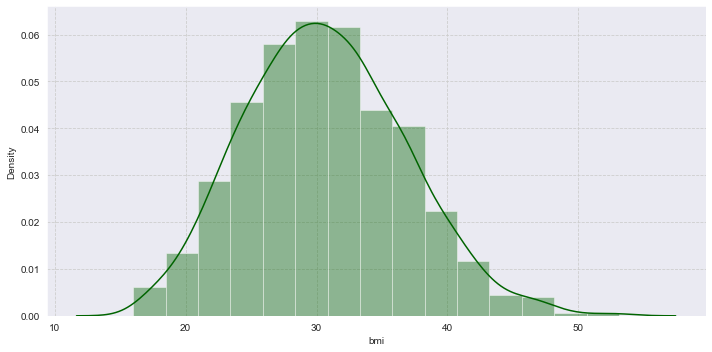

In [16]:
plt.figure(figsize=(10,5))
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
sns.distplot(df['bmi'],bins=15,color='darkgreen')
plt.tight_layout()
plt.grid(True)
plt.show()

In [17]:
df.describe()


,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [18]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [19]:
outliers = find_outliers_IQR(df["expenses"])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers: 139
max outlier value: 63770.43
min outlier value: 34617.84


14      39611.76
19      36837.47
23      37701.88
29      38711.00
30      35585.58
          ...   
1300    62592.87
1301    46718.16
1303    37829.72
1313    36397.58
1323    43896.38
Name: expenses, Length: 139, dtype: float64

In [20]:
label = LabelEncoder()
df.iloc[:, 1] = label.fit_transform(df.iloc[:, 1])
df.iloc[:, 5] = label.fit_transform(df.iloc[:, 5])
df.iloc[:, 4] = label.fit_transform(df.iloc[:, 4])


In [21]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


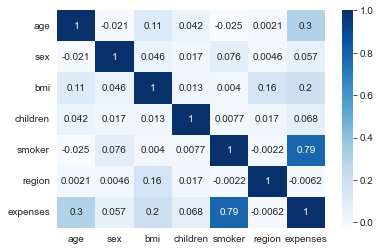

In [22]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap="Blues")
plt.show()

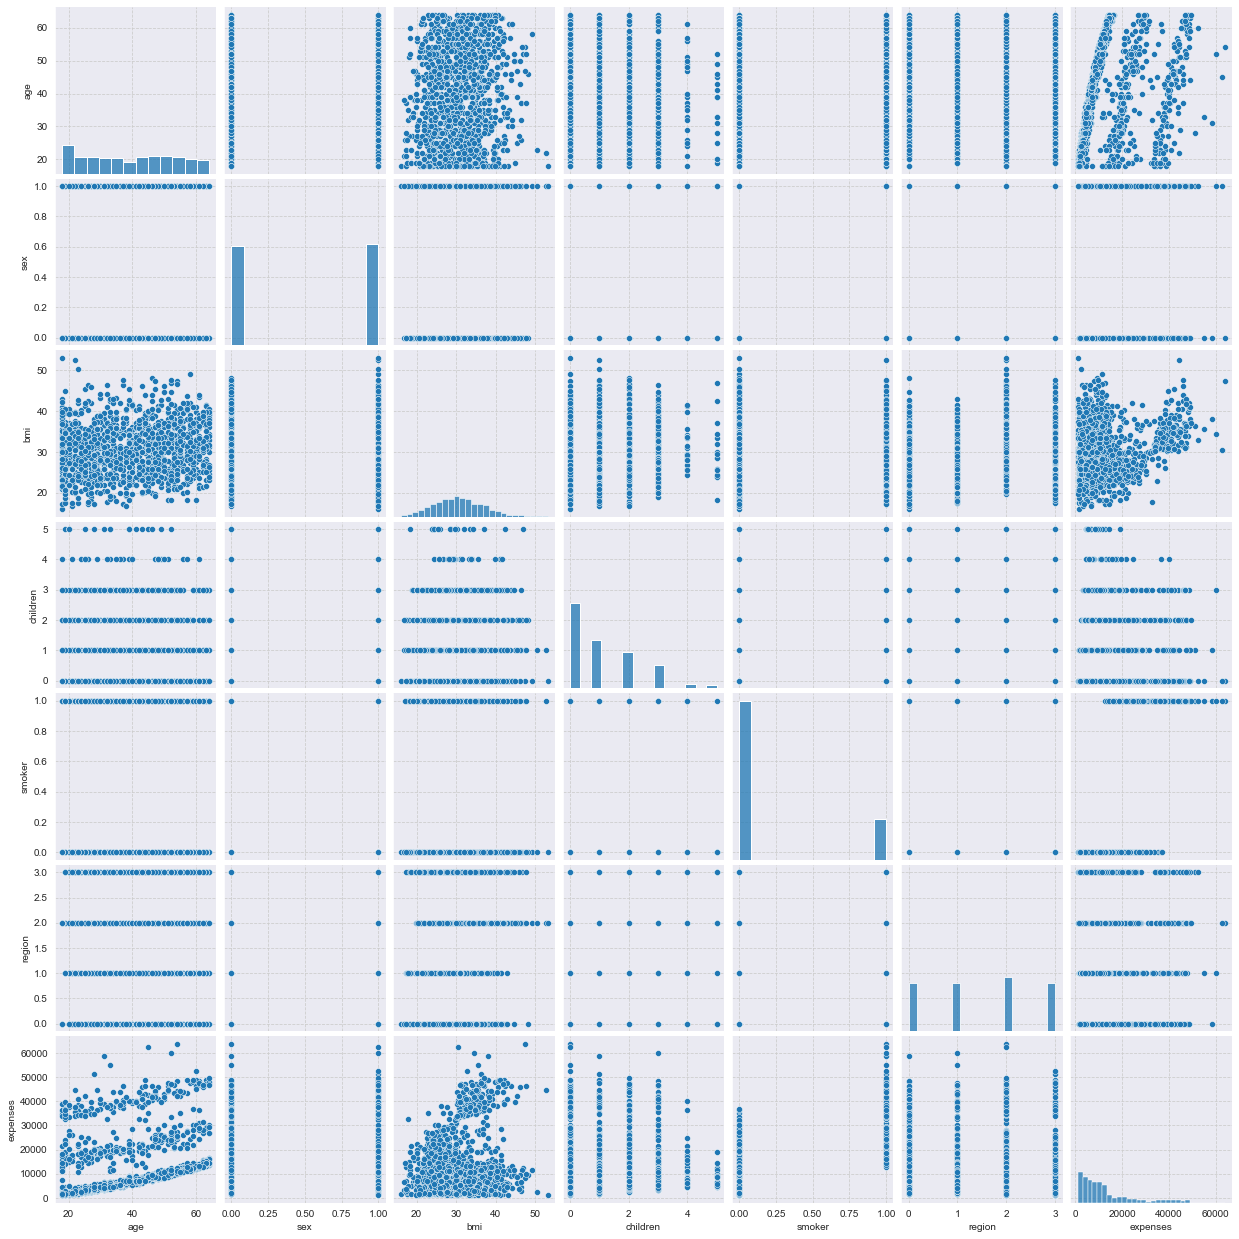

In [23]:
sns.pairplot(df)
plt.show()

In [24]:
X = df[['bmi', 'age', 'smoker', 'children']]
Y = df['expenses']


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [26]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_mlr = mlr.predict(X_test)

print("MAE: ", mean_absolute_error(y_test, y_pred_mlr))
print("MSE: ", mean_squared_error(y_test, y_pred_mlr))
print("R^2: ", r2_score(y_test, y_pred_mlr))

MAE:  4238.692051336883
MSE:  39569921.606299415
R^2:  0.7203898992593282


In [27]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

print("MAE: ", mean_absolute_error(y_test, y_pred_dtr))
print("MSE: ", mean_squared_error(y_test, y_pred_dtr))
print("R^2: ", r2_score(y_test, y_pred_dtr))

MAE:  3177.47927238806
MSE:  43792811.99049039
R^2:  0.6905499916272524


In [28]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

print("MAE: ", mean_absolute_error(y_test, y_pred_gbr))
print("MSE: ", mean_squared_error(y_test, y_pred_gbr))
print("R^2: ", r2_score(y_test, y_pred_gbr))


MAE:  4393.523986066258
MSE:  41161524.58103743
R^2:  0.7091432692423811


In [29]:
# Create the polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

# Create the linear regression model
lin_reg = LinearRegression()

# Train the model on the polynomial features
lin_reg.fit(X_poly, y_train)
# Create the polynomial features for the test data
X_test_poly = poly.transform(X_test)

# Make predictions on the test data
y_pred = lin_reg.predict(X_test_poly)
accuracy = lin_reg.score(X_test_poly, y_test)
print(accuracy)

print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("R^2: ", r2_score(y_test, y_pred))


0.8130501196287022
MAE:  2979.1553936006367
MSE:  26456812.8654991
R^2:  0.8130501196287022


In [30]:
# Print the results
print("Multiple Linear regression")
print("MAE: ", mean_absolute_error(y_test, y_pred_mlr))
print("MSE: ", mean_squared_error(y_test, y_pred_mlr))
print("R^2: ", r2_score(y_test, y_pred_mlr))
print()
print("Decision Tree Regression")
print("MAE: ", mean_absolute_error(y_test, y_pred_dtr))
print("MSE: ", mean_squared_error(y_test, y_pred_dtr))
print("R^2: ", r2_score(y_test, y_pred_dtr))
print()
print("Gradient Boosting Regression")
print("MAE: ", mean_absolute_error(y_test, y_pred_gbr))
print("MSE: ", mean_squared_error(y_test, y_pred_gbr))
print("R^2: ", r2_score(y_test, y_pred_gbr))
print()
print("Polynomial Regression")
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("R^2: ", r2_score(y_test, y_pred))


Multiple Linear regression
MAE:  4238.692051336883
MSE:  39569921.606299415
R^2:  0.7203898992593282

Decision Tree Regression
MAE:  3177.47927238806
MSE:  43792811.99049039
R^2:  0.6905499916272524

Gradient Boosting Regression
MAE:  4393.523986066258
MSE:  41161524.58103743
R^2:  0.7091432692423811

Polynomial Regression
MAE:  2979.1553936006367
MSE:  26456812.8654991
R^2:  0.8130501196287022


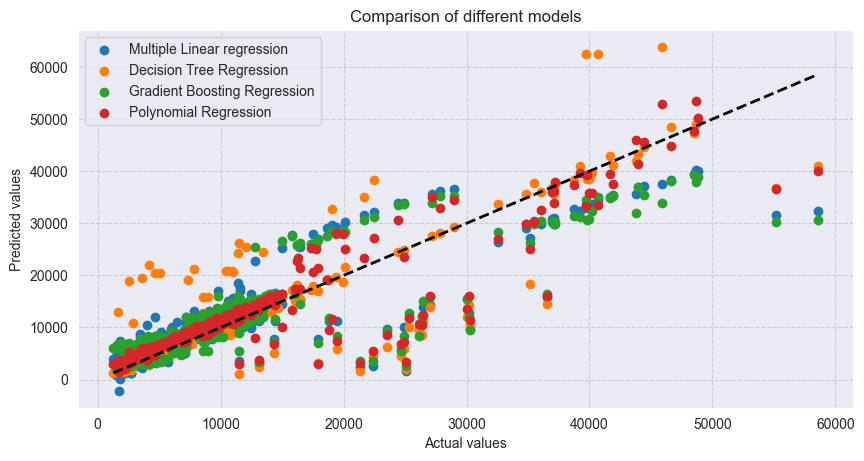

In [31]:
plt.figure(figsize=(10,5), dpi=100)

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred_mlr, label='Multiple Linear regression')
plt.scatter(y_test, y_pred_dtr, label='Decision Tree Regression')
plt.scatter(y_test, y_pred_gbr, label='Gradient Boosting Regression')
plt.scatter(y_test, y_pred, label='Polynomial Regression')

# Plot the perfect prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)

# Set the axis labels and title
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Comparison of different models')

# Add the legend
plt.legend()

# Show the plot
plt.show()
